### RQ2: How does the minimum number of nights that customers must book affect the likelihood of a property being vacant?

# Research Question 2: Gradient Boosted Regression
Below is the creation of a prediction mode using gradient boosting, featuring EDA beforehand.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns           
import matplotlib
import matplotlib.pyplot as plt  
import os
from sklearn import preprocessing 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline     
sns.set(color_codes=True)

In [28]:
# carsons_path = 'C:\\Users\\Carson\\Desktop\\cmpe351'
# carsons_path = "C:\\Users\\thoma\\Desktop\\Data Airbnb"
carsons_path = "/home/user2/CLEAN/inside-airbnb-vacancies/Data Airbnb"

listings = pd.read_csv(os.path.join(carsons_path, "listings.csv"))
sum_listings = pd.read_csv(os.path.join(carsons_path, "listings summary.csv"))
sum_nbhd = pd.read_csv(os.path.join(carsons_path, "neighbourhoods summary.csv"))
sum_rev = pd.read_csv(os.path.join(carsons_path, "reviews summary.csv"))
revs = pd.read_csv(os.path.join(carsons_path, "reviews.csv"))


Exploratory EDA Below

In [29]:
sum_nbhd.columns
sum_listings
sum_rev
revs
print(listings.columns)
listings['host_is_superhost'].head(5)
sum_nbhd.head()
sum_rev.head()
revs.head()
listings['minimum_nights']


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

0         2
1         2
2         4
3        14
4         1
         ..
91773     7
91774     3
91775     1
91776     1
91777     3
Name: minimum_nights, Length: 91778, dtype: int64

In [30]:
columns = ['minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365']

array([[<AxesSubplot:title={'center':'minimum_nights'}>]], dtype=object)

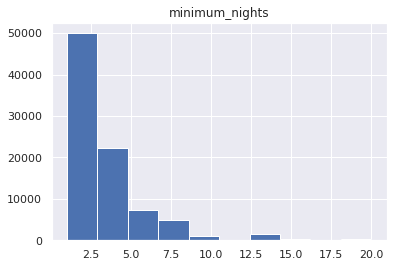

In [31]:
pd.DataFrame.hist(data = sum_listings[sum_listings['minimum_nights']<21], column='minimum_nights', bins=10)

array([[<AxesSubplot:title={'center':'calculated_host_listings_count'}>]],
      dtype=object)

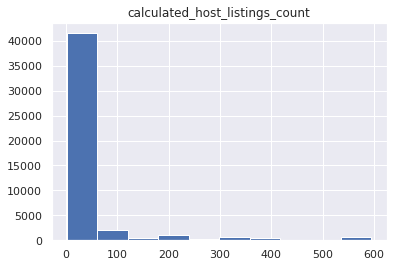

In [32]:
pd.DataFrame.hist(data = listings[listings['calculated_host_listings_count']>1], column='calculated_host_listings_count', bins=10)

In [33]:
sum_listings[sum_listings['minimum_nights']>21].count()

id                                3521
name                              3521
host_id                           3521
host_name                         3521
neighbourhood_group                  0
neighbourhood                     3521
latitude                          3521
longitude                         3521
room_type                         3521
price                             3381
minimum_nights                    3521
number_of_reviews                 3521
last_review                       1970
reviews_per_month                 1970
calculated_host_listings_count    3521
availability_365                  3521
number_of_reviews_ltm             3521
license                              0
dtype: int64

In [34]:
dud_listings =listings[listings['minimum_nights']<21]

min_nights = dud_listings['minimum_nights']
avail_356 = dud_listings['availability_365']
avail_90 = dud_listings['availability_90']
avail_60 = dud_listings['availability_60']
avail_30 = dud_listings['availability_30']

corr_365 = avail_356.corr(min_nights)
corr_90 = avail_90.corr(min_nights)
corr_60 = avail_60.corr(min_nights)
corr_30 = avail_30.corr(min_nights)

print(corr_365)
print(corr_90)
print(corr_60)
print(corr_30)

-0.01777665863703028
-0.02700924176144378
-0.02703951875886655
-0.017033694676708146


In [35]:
listings = listings[listings['host_is_superhost'] == 't']
len(listings)

15120

In [36]:
dud_listings = listings[listings['minimum_nights'] > 100]

min_nights = dud_listings['minimum_nights']
avail_356 = dud_listings['availability_365']
avail_90 = dud_listings['availability_90']
avail_60 = dud_listings['availability_60']
avail_30 = dud_listings['availability_30']

corr_365 = avail_356.corr(min_nights)
corr_90 = avail_90.corr(min_nights)
corr_60 = avail_60.corr(min_nights)
corr_30 = avail_30.corr(min_nights)

print(corr_365)
print(corr_90)
print(corr_60)
print(corr_30)

0.15802751941808477
0.16671612266456823
0.036522305979628
0.061692515283451294


In [37]:
unbooked = listings[listings['availability_365'] > 3]
unbooked

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,42010,https://www.airbnb.com/rooms/42010,20231210055232,2023-12-10,city scrape,Home in East Finchley · ★4.88 · 1 bedroom · 1 ...,NaN,We have a unique cinema called the Phoenix whi...,https://a0.muscache.com/pictures/airflow/Hosti...,157884,...,4.95,4.73,4.87,NaN,t,2,0,2,0,3.45
6,96052,https://www.airbnb.com/rooms/96052,20231210055232,2023-12-10,city scrape,Condo in London · ★4.82 · 2 bedrooms · 1 bed ·...,NaN,"Residential, quiet and green neighbourhood wit...",https://a0.muscache.com/pictures/airflow/Hosti...,448154,...,4.90,4.45,4.70,NaN,f,2,0,2,0,0.52
8,390987,https://www.airbnb.com/rooms/390987,20231210055232,2023-12-10,city scrape,Home in London · ★4.73 · 8 bedrooms · 1 bed · ...,NaN,The neighbourhood is safe and many new cafes a...,https://a0.muscache.com/pictures/8841768/8130b...,1955537,...,4.83,4.75,4.75,NaN,f,3,0,3,0,0.09
12,117203,https://www.airbnb.com/rooms/117203,20231210055232,2023-12-10,city scrape,Rental unit in London · ★4.86 · 1 bedroom · 1 ...,NaN,For the lovers of long walks or bike rides - ...,https://a0.muscache.com/pictures/d2e37be3-d606...,255103,...,4.93,4.54,4.72,NaN,f,1,1,0,0,0.59
22,843488,https://www.airbnb.com/rooms/843488,20231210055232,2023-12-10,city scrape,Rental unit in London · ★4.88 · 1 bedroom · 1 ...,NaN,High Street Kensington 12 minutes walk. Hollan...,https://a0.muscache.com/pictures/e3898b21-7c87...,1965214,...,5.00,4.75,5.00,NaN,f,1,0,1,0,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91741,937610241948170012,https://www.airbnb.com/rooms/937610241948170012,20231210055232,2023-12-11,city scrape,Home in Greater London · ★4.83 · 3 bedrooms · ...,NaN,Popular and trendy neighbourhood surrounded by...,https://a0.muscache.com/pictures/miso/Hosting-...,282569271,...,5.00,4.50,4.83,NaN,t,6,6,0,0,1.45
91743,939590573238588626,https://www.airbnb.com/rooms/939590573238588626,20231210055232,2023-12-10,city scrape,Home in Greater London · ★5.0 · 1 bedroom · 1 ...,NaN,This is an artsy hipster neighbourhood with go...,https://a0.muscache.com/pictures/miso/Hosting-...,2266385,...,5.00,5.00,5.00,NaN,f,3,0,3,0,1.30
91744,939603500360637137,https://www.airbnb.com/rooms/939603500360637137,20231210055232,2023-12-11,city scrape,Home in Greater London · ★4.63 · 3 bedrooms · ...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,124763657,...,4.63,4.75,4.75,NaN,f,1,1,0,0,1.73
91748,942060370650034915,https://www.airbnb.com/rooms/942060370650034915,20231210055232,2023-12-10,city scrape,Condo in Greater London · ★5.0 · 1 bedroom · 1...,NaN,This room with private en-suite toilet is perf...,https://a0.muscache.com/pictures/miso/Hosting-...,1877401,...,5.00,5.00,5.00,NaN,f,1,0,1,0,1.54


In [38]:
one_night = listings[listings['minimum_nights'] == 1]
print(len(one_night))
one_night = one_night[one_night['availability_365']>3]
one_night

3740


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
24,874463,https://www.airbnb.com/rooms/874463,20231210055232,2023-12-10,city scrape,Rental unit in London · ★4.82 · 1 bedroom · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/89283215/d8e6...,4616179,...,4.88,4.76,4.70,NaN,f,2,0,2,0,0.79
54,1562712,https://www.airbnb.com/rooms/1562712,20231210055232,2023-12-10,city scrape,Bed and breakfast in Greater London · ★4.87 · ...,NaN,Crystal Palace ground at Selhurst Park is 40 m...,https://a0.muscache.com/pictures/miso/Hosting-...,6014741,...,4.92,4.84,4.88,NaN,f,1,0,1,0,8.55
70,6050854,https://www.airbnb.com/rooms/6050854,20231210055232,2023-12-10,city scrape,Home in London · ★4.65 · 1 bedroom · 1 bed · 1...,NaN,NaN,https://a0.muscache.com/pictures/e1cce1e7-7088...,16774103,...,4.76,4.49,4.68,NaN,f,4,0,4,0,0.68
97,2729885,https://www.airbnb.com/rooms/2729885,20231210055232,2023-12-11,city scrape,Condo in London · ★4.85 · 1 bedroom · 1 bed · ...,NaN,London is literally on your doorstep! <br />2-...,https://a0.muscache.com/pictures/3e482895-1fec...,2369445,...,4.96,4.99,4.79,NaN,f,3,1,2,0,3.43
123,6860603,https://www.airbnb.com/rooms/6860603,20231210055232,2023-12-10,city scrape,Townhouse in London · ★4.46 · 1 bedroom · 5 be...,NaN,"We live in a quiet, leafy, residential neighbo...",https://a0.muscache.com/pictures/71a50f9f-b1da...,34109076,...,4.70,4.38,4.54,NaN,t,4,0,4,0,2.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91696,917731767594102094,https://www.airbnb.com/rooms/917731767594102094,20231210055232,2023-12-10,city scrape,Home in Greater London · ★5.0 · 1 bedroom · 1 ...,NaN,"Feltham, United Kingdom <br />Close to all ame...",https://a0.muscache.com/pictures/hosting/Hosti...,35717855,...,5.00,4.63,4.75,NaN,f,3,0,3,0,2.70
91699,918735895845426696,https://www.airbnb.com/rooms/918735895845426696,20231210055232,2023-12-10,city scrape,Home in Greater London · 1 bedroom · 1 bed · 1...,NaN,NaN,https://a0.muscache.com/pictures/731d98e6-5d79...,64504375,...,5.00,5.00,5.00,NaN,f,2,0,2,0,0.53
91701,920865736201863646,https://www.airbnb.com/rooms/920865736201863646,20231210055232,2023-12-10,city scrape,Rental unit in Greater London · ★4.93 · 1 bedr...,NaN,Kentish Town is a beautiful area with many hid...,https://a0.muscache.com/pictures/miso/Hosting-...,7679576,...,4.93,4.93,4.86,NaN,f,4,1,3,0,2.69
91736,936268160482977868,https://www.airbnb.com/rooms/936268160482977868,20231210055232,2023-12-10,city scrape,Rental unit in Greater London · 1 bedroom · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/e4a63027-120e...,35816183,...,1.00,2.00,3.00,NaN,t,5,3,2,0,0.63


array([[<AxesSubplot:title={'center':'availability_365'}>]], dtype=object)

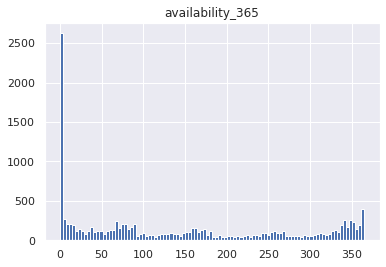

In [39]:
pd.DataFrame.hist(data = listings[listings['minimum_nights']<7], column='availability_365', bins=100)


array([[<AxesSubplot:title={'center':'availability_365'}>]], dtype=object)

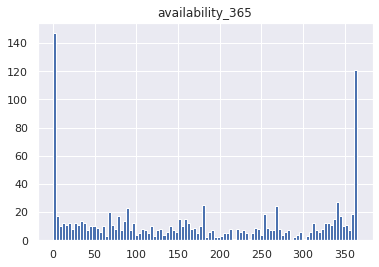

In [40]:
pd.DataFrame.hist(data = listings[listings['minimum_nights']>7], column='availability_365', bins=100)

In [41]:
more_than_a_week = listings[listings['minimum_nights']>7]
abs(len(more_than_a_week[more_than_a_week['availability_365']>3]) - len(more_than_a_week))/len(more_than_a_week)

0.12883435582822086

In [42]:
less_than_a_week = listings[listings['minimum_nights']<7]
abs(len(less_than_a_week[less_than_a_week['availability_365']<30]) - len(less_than_a_week))/len(less_than_a_week)

0.7087597832630945

Find correlations between vacancy and factors while only looking at datapoints that exist in the middle of the set. i.e exclude all and no vacancy

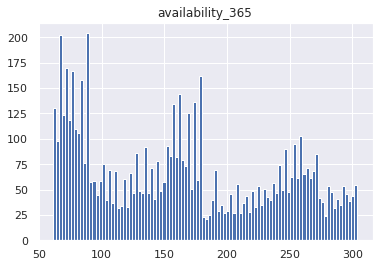

In [43]:
df_small = listings[listings['availability_365'] > 60 ]
df_small = df_small[df_small['availability_365'] < 305 ]
pd.DataFrame.hist(data = df_small, column='availability_365', bins=100)
numeric_cols = df_small.select_dtypes(include=['number'])

df_small = df_small.drop(columns=df_small.select_dtypes(exclude=['number']).columns)

In [44]:
cols = ['id', 'scrape_id', 'description', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

for col in cols:
    if abs(df_small['availability_365'].corr(df_small[col])) > 0.1:
        print('column: ', col)
        print('correlation: ', df_small['availability_365'].corr(df_small[col]))

column:  accommodates
correlation:  0.11039706939195139
column:  maximum_nights
correlation:  0.1099629376627142
column:  availability_365
correlation:  1.0


/home/user2/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/user2/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


The above does not present promising results, we will attempt a classification

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# listings
non_numeric_cols = listings.select_dtypes(exclude=['number'])
data = listings.drop(columns=listings.select_dtypes(include=['number']).columns)
cols_to_drop = ['last_scraped','amenities','listing_url', 'source', 'name','neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_about','host_thumbnail_url', 'host_picture_url','bathrooms_text','calendar_last_scraped', 'first_review', 'last_review']
data = data.drop(columns=cols_to_drop)

data = pd.get_dummies(data)


In [46]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, listings['availability_365'], test_size=0.2, random_state=42)

# Create a logistic regression model
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.1402116402116402


In [47]:
df_small = listings[listings['availability_365'] > 60 ]
df_small = df_small[df_small['availability_365'] < 305 ]
non_numeric_cols = df_small.select_dtypes(exclude=['number'])
data = df_small.drop(columns=df_small.select_dtypes(include=['number']).columns)
print(data.columns)
cols_to_drop = ['last_scraped','amenities','listing_url', 'source', 'name','neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_about','host_thumbnail_url', 'host_picture_url','bathrooms_text','calendar_last_scraped', 'first_review', 'last_review']
data = data.drop(columns=cols_to_drop)

data = pd.get_dummies(data)


Index(['listing_url', 'last_scraped', 'source', 'name',
       'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'price', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'instant_bookable'],
      dtype='object')


In [48]:
X_train, X_test, y_train, y_test = train_test_split(data, df_small['availability_365'], test_size=0.2, random_state=42)

# Create a logistic regression model
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.020786933927245732


The above Decision Tree Classifiers did not perform well, we will look at Gradient Boosted Regression.

array([[<AxesSubplot:title={'center':'availability_365'}>]], dtype=object)

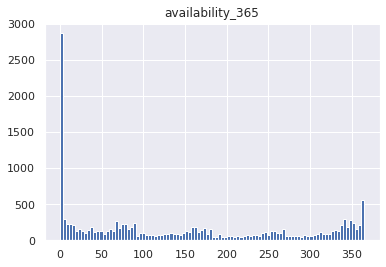

In [49]:
pd.DataFrame.hist(data = listings, column='availability_365', bins=100)

array([[<AxesSubplot:title={'center':'availability_365'}>]], dtype=object)

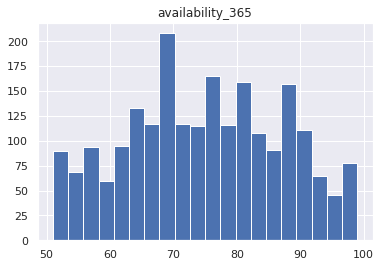

In [50]:
df_50_to_100 = listings[listings['availability_365'] > 50 ]
df_50_to_100 = df_50_to_100[df_50_to_100['availability_365'] < 100 ]
pd.DataFrame.hist(data = df_50_to_100, column='availability_365', bins=20)

array([[<AxesSubplot:title={'center':'availability_365'}>]], dtype=object)

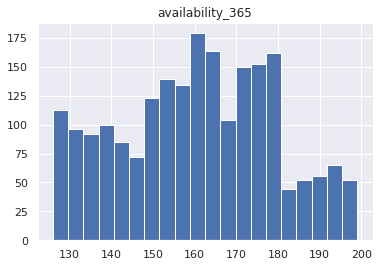

In [51]:
df_125_to_200 = listings[listings['availability_365'] > 125 ]
df_125_to_200 = df_125_to_200[df_125_to_200['availability_365'] < 200 ]
pd.DataFrame.hist(data = df_125_to_200, column='availability_365', bins=20)

array([[<AxesSubplot:title={'center':'availability_365'}>]], dtype=object)

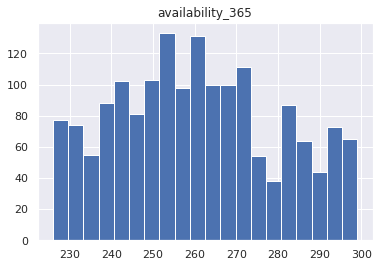

In [52]:
df_225_to_300 = listings[listings['availability_365'] > 225 ]
df_225_to_300 = df_225_to_300[df_225_to_300['availability_365'] < 300 ]
pd.DataFrame.hist(data = df_225_to_300, column='availability_365', bins=20)

In [53]:
cols = ['id', 'scrape_id', 'description', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']


for col in cols:
    if abs(df_50_to_100['availability_365'].corr(df_50_to_100[col])) > 0.1:
        print('column: ', col)
        print('correlation: ', df_50_to_100['availability_365'].corr(df_50_to_100[col]))

column:  availability_30
correlation:  0.27543929450531585
column:  availability_60
correlation:  0.16613514465778975
column:  availability_90
correlation:  0.14240869947969453
column:  availability_365
correlation:  1.0
column:  number_of_reviews_l30d
correlation:  -0.10421115312931417


In [54]:
cols = ['id', 'scrape_id', 'description', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

for col in cols:
    if abs(df_125_to_200['availability_365'].corr(df_125_to_200[col])) > 0.1:
        print('column: ', col)
        print('correlation: ', df_125_to_200['availability_365'].corr(df_125_to_200[col]))

column:  host_listings_count
correlation:  -0.15474053454813386
column:  host_total_listings_count
correlation:  -0.205486256834681
column:  maximum_minimum_nights
correlation:  -0.14344169302078416
column:  minimum_nights_avg_ntm
correlation:  -0.13789157204893412
column:  availability_30
correlation:  0.22278114926869824
column:  availability_60
correlation:  0.13584494054460614
column:  availability_365
correlation:  0.9999999999999998
column:  calculated_host_listings_count
correlation:  -0.14952647237755862
column:  calculated_host_listings_count_entire_homes
correlation:  -0.14515926411530397
column:  calculated_host_listings_count_shared_rooms
correlation:  -0.22045623565111658


/home/user2/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/user2/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [55]:
cols = ['id', 'scrape_id', 'description', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

tempCols = ['id', 'scrape_id', 'description', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'calendar_updated', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']


for col in cols:
    if abs(df_225_to_300['availability_365'].corr(df_225_to_300[col])) > 0.1:
        print('column: ', col)
        print('correlation: ', df_225_to_300['availability_365'].corr(df_225_to_300[col]))

column:  availability_365
correlation:  1.0


In [56]:
listings.columns
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,42010,https://www.airbnb.com/rooms/42010,20231210055232,2023-12-10,city scrape,Home in East Finchley · ★4.88 · 1 bedroom · 1 ...,NaN,We have a unique cinema called the Phoenix whi...,https://a0.muscache.com/pictures/airflow/Hosti...,157884,...,4.95,4.73,4.87,NaN,t,2,0,2,0,3.45
6,96052,https://www.airbnb.com/rooms/96052,20231210055232,2023-12-10,city scrape,Condo in London · ★4.82 · 2 bedrooms · 1 bed ·...,NaN,"Residential, quiet and green neighbourhood wit...",https://a0.muscache.com/pictures/airflow/Hosti...,448154,...,4.90,4.45,4.70,NaN,f,2,0,2,0,0.52
8,390987,https://www.airbnb.com/rooms/390987,20231210055232,2023-12-10,city scrape,Home in London · ★4.73 · 8 bedrooms · 1 bed · ...,NaN,The neighbourhood is safe and many new cafes a...,https://a0.muscache.com/pictures/8841768/8130b...,1955537,...,4.83,4.75,4.75,NaN,f,3,0,3,0,0.09
12,117203,https://www.airbnb.com/rooms/117203,20231210055232,2023-12-10,city scrape,Rental unit in London · ★4.86 · 1 bedroom · 1 ...,NaN,For the lovers of long walks or bike rides - ...,https://a0.muscache.com/pictures/d2e37be3-d606...,255103,...,4.93,4.54,4.72,NaN,f,1,1,0,0,0.59
21,834616,https://www.airbnb.com/rooms/834616,20231210055232,2023-12-11,city scrape,Home in London · ★4.84 · 1 bedroom · 2 beds · ...,NaN,NaN,https://a0.muscache.com/pictures/13403749/f6ad...,4365977,...,4.84,4.66,4.89,NaN,f,5,0,5,0,1.98


In [57]:
listings['last_review'] = pd.to_datetime(listings['last_review'])
listings['calendar_last_scraped'] = pd.to_datetime(listings['calendar_last_scraped'])
listings['calendar_updated'] = pd.to_datetime(listings['calendar_updated'])
listings['host_since'] = pd.to_datetime(listings['host_since'])
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'])
listings['first_review'] = pd.to_datetime(listings['first_review'])

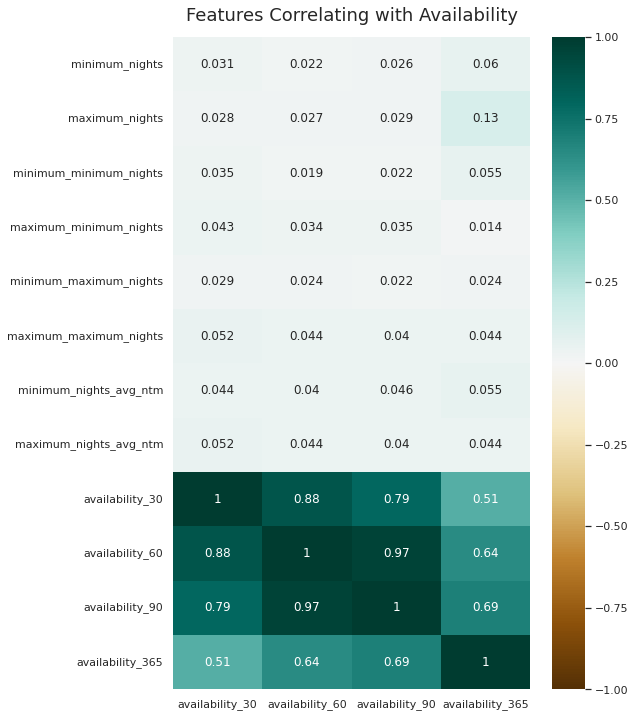

In [58]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(listings.drop(columns=tempCols).corr()[['availability_30', 'availability_60', 'availability_90', 'availability_365']], vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Availability', fontdict={'fontsize':18}, pad=16);

In [59]:
cols = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'maximum_nights','minimum_maximum_nights',
       'maximum_maximum_nights',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
    #    'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

In [60]:
cols = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'maximum_nights','minimum_maximum_nights',
       'maximum_maximum_nights',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
    #    'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

In [61]:
dfs = [listings, df_50_to_100, df_125_to_200, df_225_to_300]
targets = ['availability_30', 'availability_60', 'availability_90', 'availability_365']
names = ['listings', 'df_50_to_100', 'df_125_to_200', 'df_225_to_300']
for i in range(len(dfs)):
    for target in targets:
        X_train, X_test, y_train, y_test = train_test_split(dfs[i].drop(columns = cols), dfs[i][target], test_size=0.2, random_state=20166925)
        gb_regressor = GradientBoostingRegressor(n_estimators=400, max_depth=8, learning_rate=0.1, random_state=42)
        gb_regressor.fit(X_train, y_train)

            # Predict on the test set
        predictions = gb_regressor.predict(X_test)

        mse = mean_squared_error(y_test, predictions)**0.5
        print('df: ', names[i])
        print('target: ', target)
        print('MSE: ', mse)

df:  listings
target:  availability_30
MSE:  9.464539731243594
df:  listings
target:  availability_60
MSE:  20.53646753877343
df:  listings
target:  availability_90
MSE:  31.85668319709731
df:  listings
target:  availability_365
MSE:  121.84145513002753
df:  df_50_to_100
target:  availability_30
MSE:  9.392949147753463
df:  df_50_to_100
target:  availability_60
MSE:  19.581138023251672
df:  df_50_to_100
target:  availability_90
MSE:  29.646913637602395
df:  df_50_to_100
target:  availability_365
MSE:  12.58527059089535
df:  df_125_to_200
target:  availability_30
MSE:  9.863325621135294
df:  df_125_to_200
target:  availability_60
MSE:  19.765505069809045
df:  df_125_to_200
target:  availability_90
MSE:  29.400754189121134
df:  df_125_to_200
target:  availability_365
MSE:  20.130091111012696
df:  df_225_to_300
target:  availability_30
MSE:  9.136876484986752
df:  df_225_to_300
target:  availability_60
MSE:  17.53867985704283
df:  df_225_to_300
target:  availability_90
MSE:  25.5842487080

In [62]:
dfs = [listings, df_50_to_100, df_125_to_200, df_225_to_300]
targets = ['availability_30', 'availability_60', 'availability_90', 'availability_365']
names = ['listings', 'df_50_to_100', 'df_125_to_200', 'df_225_to_300']
for i in range(len(dfs)):
    for target in targets:
        X_train, X_test, y_train, y_test = train_test_split(dfs[i].drop(columns = cols), dfs[i][target], test_size=0.2, random_state=20166925)
        gb_regressor = GradientBoostingRegressor(n_estimators=400, max_depth=8, learning_rate=0.01, random_state=42)
        gb_regressor.fit(X_train, y_train)

            # Predict on the test set
        predictions = gb_regressor.predict(X_test)
        mse = mean_squared_error(y_test, predictions)**0.5
        print('df: ', names[i])
        print('target: ', target)
        print('MSE: ', mse)

df:  listings
target:  availability_30
MSE:  9.178716110685604
df:  listings
target:  availability_60
MSE:  19.865757196285134
df:  listings
target:  availability_90
MSE:  31.022067906482945
df:  listings
target:  availability_365
MSE:  119.35470715319796
df:  df_50_to_100
target:  availability_30
MSE:  8.969681668920414
df:  df_50_to_100
target:  availability_60
MSE:  18.769242792256463
df:  df_50_to_100
target:  availability_90
MSE:  29.03588647390238
df:  df_50_to_100
target:  availability_365
MSE:  12.28805740688193
df:  df_125_to_200
target:  availability_30
MSE:  9.263090266444607
df:  df_125_to_200
target:  availability_60
MSE:  18.69086543117608
df:  df_125_to_200
target:  availability_90
MSE:  27.69093074227191
df:  df_125_to_200
target:  availability_365
MSE:  18.52704689809637
df:  df_225_to_300
target:  availability_30
MSE:  8.89748149995073
df:  df_225_to_300
target:  availability_60
MSE:  17.092270295008106
df:  df_225_to_300
target:  availability_90
MSE:  24.621817311521

# Research Question 2: Neural Network Predictor
Below is the creation of a neural network regression predictor for vacancy rates. EDA is a prelude to the model creation.

In [63]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns                       # Visualization
import matplotlib
import matplotlib.pyplot as plt             # Visualization
import os
from sklearn import preprocessing 

# Display plots inline in the Jupyter Notebook
%matplotlib inline

# Set color codes for Seaborn
sns.set(color_codes=True) 

In [64]:
# Loading the datasets into variables.
thomas_path = "/home/user2/CLEAN/inside-airbnb-vacancies/Data Airbnb"

listings = pd.read_csv(os.path.join(thomas_path, "listings.csv"))
sum_listings = pd.read_csv(os.path.join(thomas_path, "listings summary.csv"))
sum_nbhd = pd.read_csv(os.path.join(thomas_path, "neighbourhoods summary.csv"))
sum_rev = pd.read_csv(os.path.join(thomas_path, "reviews summary.csv"))
revs = pd.read_csv(os.path.join(thomas_path, "reviews.csv"))


EDA is performed to see what data we are working with

In [65]:
print(listings.columns)
sum_listings.head()

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,34935,Rental unit in Greater London · ★4.55 · 1 bedr...,133271,Hendryks,NaN,Tower Hamlets,51.52367,-0.068886,Entire home/apt,151.0,2,122,2023-10-02,0.75,10,7,3,NaN
1,198258,Rental unit in Barking · ★4.74 · 1 bedroom · 1...,967537,Ryan,NaN,Barking and Dagenham,51.53430,0.081780,Private room,67.0,2,41,2023-03-16,0.27,1,363,1,NaN
2,228389,Home in Croydon · 1 bedroom · 1 bed · 1.5 shar...,1023326,Jocelyn,NaN,Croydon,51.36646,-0.121180,Private room,50.0,2,0,NaN,NaN,3,341,0,NaN
3,229684,Home in Lewisham · ★4.41 · 1 bedroom · 1 bed ·...,448365,Roland,NaN,Lewisham,51.48793,-0.042040,Private room,30.0,1,22,2016-11-06,0.20,3,0,0,NaN
4,230839,Rental unit in Hackney · ★4.50 · 1 bedroom · 1...,671259,Kiki,NaN,Hackney,51.53680,-0.077530,Entire home/apt,NaN,7,4,2012-08-16,0.03,1,0,0,NaN


In [66]:
columns = ['minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365']

array([[<AxesSubplot:title={'center':'minimum_nights'}>]], dtype=object)

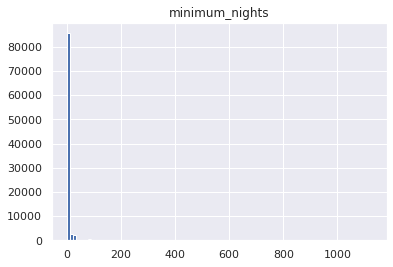

In [67]:
# Visualization of minimum number of nights
pd.DataFrame.hist(data = sum_listings, column='minimum_nights', bins=100)

In [68]:
# Count of long-term listings
sum_listings[sum_listings['minimum_nights']>21].count()

id                                3521
name                              3521
host_id                           3521
host_name                         3521
neighbourhood_group                  0
neighbourhood                     3521
latitude                          3521
longitude                         3521
room_type                         3521
price                             3381
minimum_nights                    3521
number_of_reviews                 3521
last_review                       1970
reviews_per_month                 1970
calculated_host_listings_count    3521
availability_365                  3521
number_of_reviews_ltm             3521
license                              0
dtype: int64

In [69]:
# Extracting relevant columns from the dataframe
min_nights = listings['minimum_nights']
avail_356 = listings['availability_365']
avail_90 = listings['availability_90']
avail_60 = listings['availability_60']
avail_30 = listings['availability_30']

# Calculating correlations
corr_365 = avail_356.corr(min_nights)
corr_90 = avail_90.corr(min_nights)
corr_60 = avail_60.corr(min_nights)
corr_30 = avail_30.corr(min_nights)

# Printing the correlation values
print(corr_365)
print(corr_90)
print(corr_60)
print(corr_30)

0.04385314863662187
0.03566644735993
0.037195711037940074
0.04552554648042026


In [70]:
# Explore if the subset of superhosts makes a difference.
superhost_listings = listings[listings['host_is_superhost'] == 't']
superhost_listings.describe()

,id,scrape_id,description,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.512000e+04,1.512000e+04,0.0,1.512000e+04,15120.000000,15120.000000,0.0,15120.000000,15120.000000,15120.000000,...,13909.000000,13911.000000,13910.000000,13910.000000,0.0,15120.000000,15120.000000,15120.000000,15120.000000,13901.000000
mean,4.158278e+17,2.023121e+13,NaN,1.482204e+08,8.629233,17.027315,NaN,51.507531,-0.132041,3.177183,...,4.900996,4.928956,4.811306,4.766196,NaN,7.486640,5.887302,1.577844,0.020503,1.576071
std,4.228817e+17,0.000000e+00,NaN,1.682271e+08,19.181167,55.193207,NaN,0.049415,0.099777,2.035604,...,0.178306,0.159462,0.231818,0.250294,NaN,16.849248,16.256782,4.092993,0.150323,1.575912
min,1.740200e+04,2.023121e+13,NaN,4.775000e+03,1.000000,1.000000,NaN,51.295937,-0.497800,1.000000,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.764876e+07,2.023121e+13,NaN,1.742254e+07,1.000000,2.000000,NaN,51.480947,-0.192658,2.000000,...,4.880000,4.910000,4.730000,4.690000,NaN,1.000000,0.000000,0.000000,0.000000,0.540000
50%,5.510563e+17,2.023121e+13,NaN,6.384447e+07,3.000000,4.000000,NaN,51.510990,-0.131123,2.000000,...,4.950000,4.980000,4.860000,4.810000,NaN,2.000000,1.000000,1.000000,0.000000,1.070000
75%,8.439488e+17,2.023121e+13,NaN,2.347141e+08,6.000000,9.000000,NaN,51.537373,-0.072413,4.000000,...,5.000000,5.000000,4.970000,4.910000,NaN,6.000000,3.000000,2.000000,0.000000,2.030000
max,1.042133e+18,2.023121e+13,NaN,5.377356e+08,149.000000,510.000000,NaN,51.681642,0.288570,16.000000,...,5.000000,5.000000,5.330000,5.000000,NaN,131.000000,127.000000,47.000000,3.000000,19.700000


## Building A regression model

In [71]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Neural network modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Setting environment variables for GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # Set to use GPU 0
libDevicePath = '--xla_gpu_cuda_data_dir=/usr/lib/cuda/nvvm'
os.environ['XLA_FLAGS'] = libDevicePath


2024-04-26 18:12:05.920771: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 18:12:05.920803: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 18:12:05.921891: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-26 18:12:05.926513: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-26 18:12:06.513331: W tensorflow/compiler/tf2

In [72]:
# Filtering superhost listings and selecting relevant columns
superhost_listings_filter = superhost_listings.loc[:, columns]
superhost_listings_filter.head()

# Separating features and target variables
y30 = superhost_listings_filter['availability_30']
y60 = superhost_listings_filter['availability_60']
y90 = superhost_listings_filter['availability_90']
y365 = superhost_listings_filter['availability_365']
X = superhost_listings_filter.drop(['availability_30', 'availability_60', 'availability_90', 'availability_365', 'has_availability'], axis=1)

# Converting data to numpy arrays
X = np.array(X)
y30 = np.array(y30)
y60 = np.array(y60)
y90 = np.array(y90)
y365 = np.array(y365)


## FIRST MODEL: Neural Network - Predicting 365 Day Vacancy - Superhost Listings

In [74]:

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y365,
                                                    test_size=0.2,
                                                    random_state=123)

# Printing the shapes of training and testing data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Scaling features using MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# Creating the neural network model
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5)) # Specify a dropout percentage between 0 and 0.5, or larger
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5)) # Specify a dropout percentage between 0 and 0.5, or larger
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5)) # Specify a dropout percentage between 0 and 0.5, or larger
model.add(Dense(1, activation='linear')) # Output node
model.summary() # Display model summary

# Compiling the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Defining early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights=True)

# Fitting the model
# Attaching it to a new variable called 'history' to monitor learning curves
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)

(12096, 10) (3024, 10) (12096,) (3024,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              11000     
                                                                 
 dropout_3 (Dropout)         (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dropout_4 (Dropout)         (None, 500)               0         
                                                                 
 dense_6 (Dense)             (None, 250)               125250    
                                                                 
 dropout_5 (Dropout)         (None, 250)               0         
                                                                 
 dense_7 (Dens

I0000 00:00:1714169592.649415   25613 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


242/242 [==============================] - 2s 4ms/step - loss: 11228.0420 - mae: 87.4151 - val_loss: 9497.4365 - val_mae: 82.0294
Epoch 2/5000
242/242 [==============================] - 1s 3ms/step - loss: 9866.8135 - mae: 81.9187 - val_loss: 9377.4756 - val_mae: 82.3172
Epoch 3/5000
242/242 [==============================] - 1s 3ms/step - loss: 9795.8418 - mae: 81.1284 - val_loss: 9232.3145 - val_mae: 81.0557
Epoch 4/5000
242/242 [==============================] - 1s 3ms/step - loss: 9769.8555 - mae: 80.7236 - val_loss: 9398.2939 - val_mae: 81.1225
Epoch 5/5000
242/242 [==============================] - 1s 3ms/step - loss: 9689.0293 - mae: 80.2226 - val_loss: 9222.0596 - val_mae: 78.2145
Epoch 6/5000
242/242 [==============================] - 1s 3ms/step - loss: 9608.4688 - mae: 79.6155 - val_loss: 9274.0029 - val_mae: 78.9633
Epoch 7/5000
242/242 [==============================] - 1s 2ms/step - loss: 9656.2998 - mae: 79.8282 - val_loss: 9188.6367 - val_mae: 80.3137
Epoch 8/5000
242/2

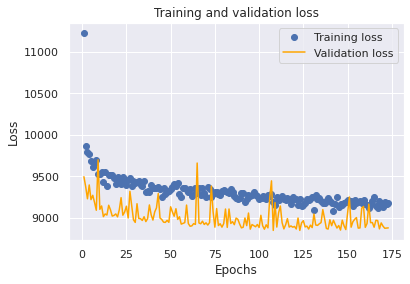

In [75]:
# Extracting loss values from history dictionary
history_dict = history.history
loss_values = history_dict['loss']  # You can change this
val_loss_values = history_dict['val_loss']  # You can also change this

# Range of X (number of epochs)
epochs = range(1, len(loss_values) + 1)

# Plotting training and validation loss
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

95/95 [==============================] - 0s 695us/step


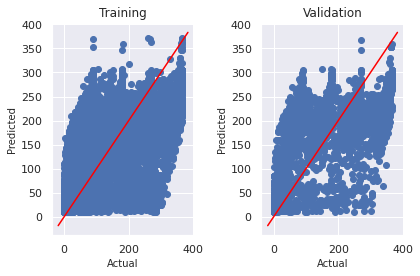

In [76]:
# Scatterplot of actual vs. predicted values
# Specify the dimensions 
fig, axes = plt.subplots(1, 2)  # 1 row, 2 columns

# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train))  # First row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted", fontsize=10)
axes[0].set_title("Training")
# Add 45-degree line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test))  # First row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted", fontsize=10)
axes[1].set_title("Validation")
# Add 45-degree line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# Tight layout
fig.tight_layout()

# Show the plot
plt.show()

In [77]:
# Predictions and Mean Square Error calculation
pred = model.predict(X_test)

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, trainpreds)**0.5)  # Train RMSE
print(mean_squared_error(y_test, pred)**0.5)  # Test RMSE

378/378 [==============================] - 0s 631us/step
93.42084061409956
94.08399685201172


## SECOND MODEL: Neural Network - Predicting 90 Day Vacancy - Superhost Listings

In [78]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y90,
                                                    test_size=0.2,
                                                    random_state=123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Scale the features using MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# Compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Define the early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights=True)

# Fit the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)


(12096, 10) (3024, 10) (12096,) (3024,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              11000     
                                                                 
 dropout_6 (Dropout)         (None, 1000)              0         
                                                                 
 dense_9 (Dense)             (None, 500)               500500    
                                                                 
 dropout_7 (Dropout)         (None, 500)               0         
                                                                 
 dense_10 (Dense)            (None, 250)               125250    
                                                                 
 dropout_8 (Dropout)         (None, 250)               0         
                                                                 
 dense_11 (Den

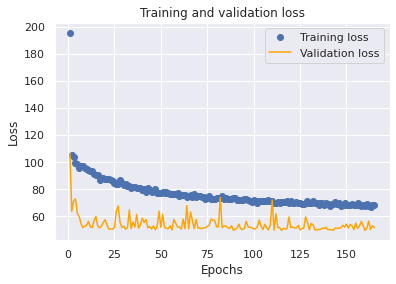

In [79]:
# Extract loss values from history
history_dict = history.history
loss_values = history_dict['loss']  # training loss
val_loss_values = history_dict['val_loss']  # validation loss

# Plot training and validation loss
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

95/95 [==============================] - 0s 639us/step


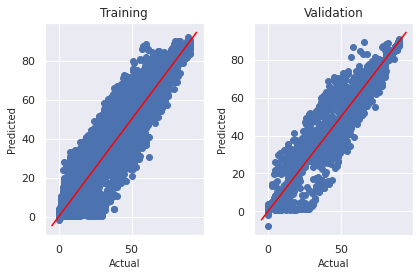

In [80]:
# Scatterplot of actual vs. predicted values
# Specify the dimensions
fig, axes = plt.subplots(1, 2)  # 1 row, 2 columns

# Plot for training results
axes[0].scatter(x=y_train, y=model.predict(X_train))  # First row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted", fontsize=10)
axes[0].set_title("Training")
# Add 45-degree line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# Plot for validation results
axes[1].scatter(x=y_test, y=model.predict(X_test))  # First row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted", fontsize=10)
axes[1].set_title("Validation")
# Add 45-degree line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

In [81]:
# Predictions and Mean Squared Error calculation
pred = model.predict(X_test)

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, trainpreds)**0.5)  # Train RMSE
print(mean_squared_error(y_test, pred)**0.5)  # Test RMSE

378/378 [==============================] - 0s 607us/step
6.751274396066632
7.044542035238753


## THIRD MODEL: Neural Network - Predicting 90 day Vacancy Rate - All Hosts & Listings

In [82]:
# Filter the listings
listings_filter = listings.loc[:, columns]
listings_filter.head()
listings_filter = listings_filter[listings_filter['maximum_nights'] < 1000]
listings_filter = listings_filter[listings_filter['minimum_maximum_nights'] < 1000]

# Extract features and target variables
y30 = listings_filter['availability_30']
y60 = listings_filter['availability_60']
y90 = listings_filter['availability_90']
y365 = listings_filter['availability_365']
X = listings_filter.drop(['availability_30', 'availability_60', 'availability_90', 'availability_365', 'has_availability'], axis=1)

X = np.array(X)
y30 = np.array(y30)
y60 = np.array(y60)
y90 = np.array(y90)
y365 = np.array(y365)


In [83]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y90,
                                                    test_size=0.2,
                                                    random_state=123)

# Print the shapes of the datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Use MinMax scaler for feature scaling
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Define early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights=True)

# Fit the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)


(39438, 10) (9860, 10) (39438,) (9860,)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1000)              11000     
                                                                 
 dropout_9 (Dropout)         (None, 1000)              0         
                                                                 
 dense_13 (Dense)            (None, 500)               500500    
                                                                 
 dropout_10 (Dropout)        (None, 500)               0         
                                                                 
 dense_14 (Dense)            (None, 250)               125250    
                                                                 
 dropout_11 (Dropout)        (None, 250)               0         
                                                                 
 dense_15 (Den

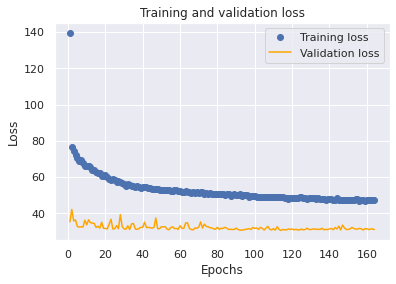

In [84]:
# Extract loss values from the history dictionary
history_dict = history.history
loss_values = history_dict['loss'] # training loss
val_loss_values = history_dict['val_loss'] # validation loss

# Define epochs range
epochs = range(1, len(loss_values) + 1)

# Plot training and validation loss
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

309/309 [==============================] - 0s 616us/step


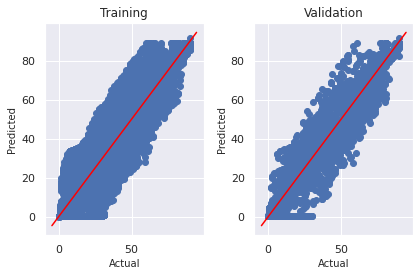

In [85]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [86]:
# Predictions and Mean Squared Error calculation
pred = model.predict(X_test)

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, trainpreds)**0.5)  # Train RMSE
print(mean_squared_error(y_test, pred)**0.5)  # Test RMSE

1233/1233 [==============================] - 1s 626us/step
5.639157395148032
5.537439542802208


## FOURTH MODEL: Neural Network - Predicting 365 day Vacancy Rate - All Hosts & Listings

In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y365,
                                                    test_size=0.2,
                                                    random_state=123)

# Print the shapes of the datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Use MinMax scaler for feature scaling
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Define early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights=True)

# Fit the model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)


(39438, 10) (9860, 10) (39438,) (9860,)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1000)              11000     
                                                                 
 dropout_12 (Dropout)        (None, 1000)              0         
                                                                 
 dense_17 (Dense)            (None, 500)               500500    
                                                                 
 dropout_13 (Dropout)        (None, 500)               0         
                                                                 
 dense_18 (Dense)            (None, 250)               125250    
                                                                 
 dropout_14 (Dropout)        (None, 250)               0         
                                                                 
 dense_19 (Den

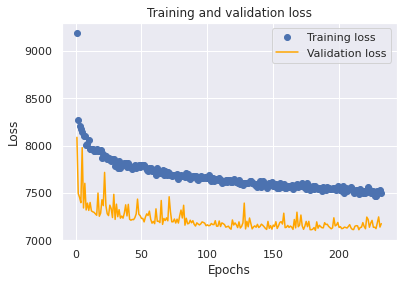

In [88]:
# Extract loss values from the history dictionary
history_dict = history.history
loss_values = history_dict['loss'] # training loss
val_loss_values = history_dict['val_loss'] # validation loss

# Define epochs range
epochs = range(1, len(loss_values) + 1)

# Plot training and validation loss
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

309/309 [==============================] - 0s 577us/step


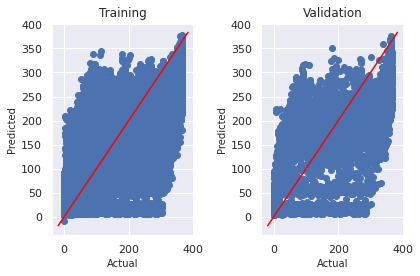

In [89]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [90]:
# Predictions and Mean Squared Error calculation
pred = model.predict(X_test)

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, trainpreds)**0.5)  # Train RMSE
print(mean_squared_error(y_test, pred)**0.5)  # Test RMSE

1233/1233 [==============================] - 1s 593us/step
84.95634354949516
84.28166462204952
